In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'data/pkl_data/train.p'
testing_file = 'data/pkl_data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']

print('Reading data done!')

Reading data done!


In [2]:
### Replace each question mark with the appropriate value.
import numpy as np
# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = x_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.append(y_train,y_test)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### 1. Visualization of the German Traffic Signs Dataset using the pickled file. this include: plotting traffic sign images, plotting the count of each sign, etc.



15


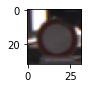

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(x_train))
image = x_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

Text(0.5, 1.0, 'histogram before data preprocessing')

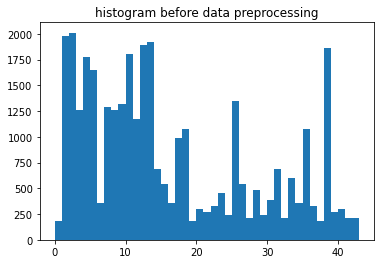

In [4]:
# Visulization of the histogram
images_per_class, bins, _ = plt.hist(y_train,bins=range(n_classes+1))
plt.title('histogram before data preprocessing')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test model on the [German Traffic Sign Dataset]

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# 1. rgb to grayscale 
# 2. apply histogram equalization
# 3. normalize the training and testing data to [-1 1]
import cv2
def grayAndEqualizeHist(img):
    """

    :param img: input RGB image
    :return: histogram equalized grayscale image
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY )
    equ  = cv2.equalizeHist(gray)
    #equ  = equ - 128. / 128.
    return equ


x_train = np.array([grayAndEqualizeHist(img) for img in x_train])
x_test = np.array([grayAndEqualizeHist(img) for img in x_test])

print('preprocessed the data')
print(x_test[929])

preprocessed the data
[[ 40  20  20 ... 103  68  52]
 [ 68  52  52 ...  93  93  68]
 [ 93  52  40 ...  93  93  52]
 ...
 [ 40  20  40 ...  93  93  93]
 [ 20  20  20 ...  52  52  52]
 [  2  20  52 ...  68  68  68]]


### 2.2 generate more images with a random similarity transform (2x3 matrix)

Visulization of one image: before and after similarity transform
[[ 40  20  20 ... 103  68  52]
 [ 68  52  52 ...  93  93  68]
 [ 93  52  40 ...  93  93  52]
 ...
 [ 40  20  40 ...  93  93  93]
 [ 20  20  20 ...  52  52  52]
 [  2  20  52 ...  68  68  68]]


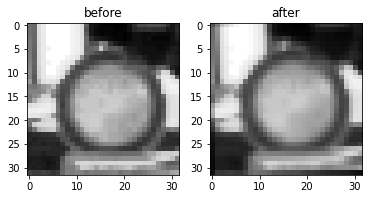

In [ ]:

import random
import math
import cv2

def applyRandSimilarityTran(image, n):
    """ 
        apply random similarity transformation to the image, and return
        n transformed images
    """
    output_images = np.zeros((n,32,32))

    for i in range(n):
        angle = random.uniform(-15, 15) # rotation

        s = random.uniform(0.7, 1.3)    # scale

        rows,cols = image.shape[0:2]
        image_center = (rows/2.0, cols/2.0)
        rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1)
        M_rot = np.vstack([rot_mat,[0,0,1]])

        tx = random.uniform(-2, 2)      # translation along x axis
        ty = random.uniform(-2, 2)      # translation along y axis
        M_tran = np.float32([[1,0,tx],[0,1,ty],[0,0,1]])

        M = np.matrix(M_tran) * np.matrix(M_rot)

        M = np.float32(M[:2][:]) # similarity transform

        tmp = cv2.warpAffine(image, M, (cols, rows))    
        output_images[i][:][:] = tmp
        
        #cv2.equalizeHist(image, image)
        
    return output_images


# visulize the similarity transformation for one image
image = x_train[index].squeeze()
plt.figure
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('before')

new_image = applyRandSimilarityTran(image, 1)
plt.subplot(1,2,2)
plt.imshow(new_image[0][:][:], cmap='gray')
plt.title('after')
    
print('Visulization of one image: before and after similarity transform')
print(x_test[929])

In [8]:
print('Generating 5 times more additional data...')    
n = 5
x_added = np.vstack([applyRandSimilarityTran(im,n) for im in x_train])
y_added = np.repeat(y_train, n)

# append the generated data to the training data
x_train = np.append(x_train, x_added, axis=0)
x_train = x_train[...,np.newaxis]
y_train = np.append(y_train, y_added, axis=0)
print(x_test[929])

x_test = x_test[...,np.newaxis]
print('Generated data are added into training data!')
print(x_test[929])

Generating 5 times more additional data...
[[ 40  20  20 ... 103  68  52]
 [ 68  52  52 ...  93  93  68]
 [ 93  52  40 ...  93  93  52]
 ...
 [ 40  20  40 ...  93  93  93]
 [ 20  20  20 ...  52  52  52]
 [  2  20  52 ...  68  68  68]]
Generated data are added into training data!
[[[ 40]
  [ 20]
  [ 20]
  ...
  [103]
  [ 68]
  [ 52]]

 [[ 68]
  [ 52]
  [ 52]
  ...
  [ 93]
  [ 93]
  [ 68]]

 [[ 93]
  [ 52]
  [ 40]
  ...
  [ 93]
  [ 93]
  [ 52]]

 ...

 [[ 40]
  [ 20]
  [ 40]
  ...
  [ 93]
  [ 93]
  [ 93]]

 [[ 20]
  [ 20]
  [ 20]
  ...
  [ 52]
  [ 52]
  [ 52]]

 [[  2]
  [ 20]
  [ 52]
  ...
  [ 68]
  [ 68]
  [ 68]]]


### Generate the validation set from the training set

In [9]:
### Generate the validation set from the training set
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Number of validation examples.
n_validation = len(y_validation)
# Number of training examples
n_train = len(y_train)
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", len(y_test))
print(x_test[929])

Number of training examples = 167035
Number of validation examples = 41759
Number of testing examples = 12630
[[[ 40]
  [ 20]
  [ 20]
  ...
  [103]
  [ 68]
  [ 52]]

 [[ 68]
  [ 52]
  [ 52]
  ...
  [ 93]
  [ 93]
  [ 68]]

 [[ 93]
  [ 52]
  [ 40]
  ...
  [ 93]
  [ 93]
  [ 52]]

 ...

 [[ 40]
  [ 20]
  [ 40]
  ...
  [ 93]
  [ 93]
  [ 93]]

 [[ 20]
  [ 20]
  [ 20]
  ...
  [ 52]
  [ 52]
  [ 52]]

 [[  2]
  [ 20]
  [ 52]
  ...
  [ 68]
  [ 68]
  [ 68]]]


### CNN configuration and hyperparameter optimization 

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
# Conv 32x32x1 => 28x28x6.
model.add(layers.Conv2D(filters = 6, kernel_size = (5, 5), strides=(1, 1), padding='valid', 
                        activation='relu', data_format = 'channels_last', input_shape = (32, 32, 1)))
# Maxpool 28x28x6 => 14x14x6
model.add(layers.MaxPooling2D((2, 2)))
# Conv 14x14x6 => 10x10x16
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
# Maxpool 10x10x16 => 5x5x16
model.add(layers.MaxPooling2D((2, 2)))
# Flatten 5x5x16 => 400
model.add(layers.Flatten())
# Fully connected 400 => 120
model.add(layers.Dense(120, activation='relu'))
# Fully connected 120 => 84
model.add(layers.Dense(84, activation='relu'))
# Dropout
model.add(layers.Dropout(0.2))
# Fully connected, output layer 84 => 43
model.add(layers.Dense(43, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
conv = model.fit(x_train, y_train, batch_size=100, epochs=10, 
                    validation_data=(x_validation, y_validation))

# conv = model.fit(x_train, y_train)
model.save('my_model.h5')

Epoch 1/10
1671/1671 [==============================] - 53s 31ms/step - loss: 2.0959 - accuracy: 0.4916 - val_loss: 0.9340 - val_accuracy: 0.7032
Epoch 2/10
1671/1671 [==============================] - 52s 31ms/step - loss: 0.7373 - accuracy: 0.7662 - val_loss: 0.4425 - val_accuracy: 0.8576
Epoch 3/10
1671/1671 [==============================] - 54s 32ms/step - loss: 0.4600 - accuracy: 0.8534 - val_loss: 0.3113 - val_accuracy: 0.9018
Epoch 4/10
1671/1671 [==============================] - 58s 35ms/step - loss: 0.3345 - accuracy: 0.8943 - val_loss: 0.2590 - val_accuracy: 0.9171
Epoch 5/10
1671/1671 [==============================] - 60s 36ms/step - loss: 0.2554 - accuracy: 0.9187 - val_loss: 0.2416 - val_accuracy: 0.9245
Epoch 6/10
1671/1671 [==============================] - 58s 35ms/step - loss: 0.2127 - accuracy: 0.9327 - val_loss: 0.1937 - val_accuracy: 0.9410
Epoch 7/10
1671/1671 [==============================] - 59s 35ms/step - loss: 0.1850 - accuracy: 0.9414 - val_loss: 0.1783 -

In [13]:

model.evaluate(x=x_test, y=y_test)

395/395 [==============================] - 2s 5ms/step - loss: 0.3557 - accuracy: 0.9288


[0.3557344377040863, 0.9288202524185181]

C:\Python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
Predicted sign: [17]


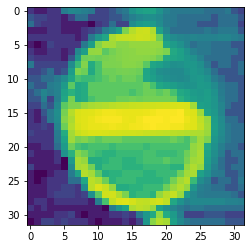

In [15]:
plt.imshow(x_test[929].reshape(32, 32))
print("Predicted sign: "+ str(model.predict_classes(x_test[929].reshape(1, 32, 32, 1))))

In [17]:
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [18]:
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

395/395 - 2s - loss: 0.3557 - accuracy: 0.9288
Restored model, accuracy: 92.88%


Predicted sign: [17]
[[[ 40]
  [ 20]
  [ 20]
  ...
  [103]
  [ 68]
  [ 52]]

 [[ 68]
  [ 52]
  [ 52]
  ...
  [ 93]
  [ 93]
  [ 68]]

 [[ 93]
  [ 52]
  [ 40]
  ...
  [ 93]
  [ 93]
  [ 52]]

 ...

 [[ 40]
  [ 20]
  [ 40]
  ...
  [ 93]
  [ 93]
  [ 93]]

 [[ 20]
  [ 20]
  [ 20]
  ...
  [ 52]
  [ 52]
  [ 52]]

 [[  2]
  [ 20]
  [ 52]
  ...
  [ 68]
  [ 68]
  [ 68]]]


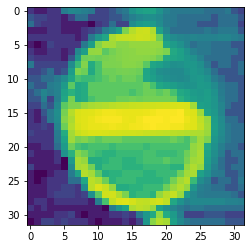

In [19]:
plt.imshow(x_test[929].reshape(32, 32))
print("Predicted sign: "+ str(new_model.predict_classes(x_test[929].reshape(1, 32, 32, 1))))
print(x_test[929])

In [20]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

img= cv2.imread("images/2.png")
# print(img)
img = np.asarray(img)
# print(img)
img = cv2.resize(img, (32, 32))
img = grayAndEqualizeHist(img)
cv2.imshow("Processed Image", img)

cv2.waitKey(0)
cv2.destroyAllWindows()


Predicted sign: [1]


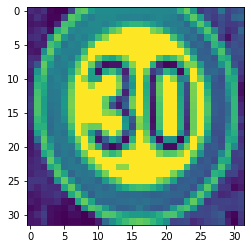

In [21]:
img = img[...,np.newaxis]
# print(img)
plt.imshow(img.reshape(32,32))
print("Predicted sign: "+ str(new_model.predict_classes(img.reshape(1, 32, 32, 1))))

In [ ]:
import numpy as np
import cv2
import pickle
 
#############################################
 
frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
threshold = 0.55         # PROBABLITY THRESHOLD
font = cv2.FONT_HERSHEY_SIMPLEX
##############################################
 
# SETUP THE VIDEO CAMERA
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
# IMPORT THE TRANNIED MODEL
# pickle_in=open("model_trained.p","rb")  ## rb = READ BYTE
# model=pickle.load(pickle_in)
 
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img
def getCalssName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'
    
while True:
 
    # READ IMAGE
    success, imgOrignal = cap.read()
    
    # PROCESS IMAGE
    #new
    img = np.asarray(imgOrignal)
    # print(img)
    img = cv2.resize(img, (32, 32))
    img = grayAndEqualizeHist(img)
    cv2.imshow("Processed Image", img)
    img = img[...,np.newaxis]
    img = img.reshape(1, 32, 32, 1)
    #old
    # img = np.asarray(imgOrignal)
    # img = cv2.resize(img, (32, 32))
    # img = preprocessing(img)
    # cv2.imshow("Processed Image", img)
    # img = img.reshape(1, 32, 32, 1)
    cv2.putText(imgOrignal, "CLASS: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    # PREDICT IMAGE
    predictions = new_model.predict(img)
    classIndex = new_model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
        #print(getCalssName(classIndex))
        cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.imshow("Result", imgOrignal)
    
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break